In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
LIBS_ANALYZED = [
    {
        'name': 'guava',
        'versions': {
            'v33.0': '2023-12-18',
            'v32.0': '2023-05-26',
            'v31.0': '2021-09-24',
            'v30.0': '2020-10-16',
            'v29.0': '2020-04-13',
            'v28.0': '2019-06-11',
            'v27.0': '2018-10-18',
            'v26.0': '2018-08-01',
            'v25.0': '2018-04-25',
            'v24.0': '2018-02-01',
            'v23.0': '2017-08-04',
            'v22.0': '2017-05-22',
            'v21.0': '2017-01-12',
            'v20.0': '2016-10-28',
            'v19.0': '2015-12-09',
            'v18.0': '2014-08-25',
            'v17.0': '2014-04-22',
            'v16.0': '2014-01-17',
            'v15.0': '2013-09-06',
            'v14.0': '2013-02-25',
            'v13.0': '2012-08-02',
            'v12.0': '2012-04-30',
            'v11.0': '2011-12-17',
            'v10.0': '2011-09-27'
        }
    },
    {
        'name': 'commons-lang',
        'versions': {
            'v3.17': '2024-08-29',
            'v3.16': '2024-08-07',
            'v3.15': '2024-07-17',
            'v3.14': '2023-11-22',
            'v3.13': '2023-07-28',
            'v3.12': '2021-03-01',
            'v3.11': '2020-07-16',
            'v3.10': '2020-03-27',
            'v3.9': '2019-04-15',
            'v3.8': '2018-08-19',
            'v3.7': '2017-11-08',
            'v3.6': '2017-06-12',
            'v3.5': '2016-10-20',
            'v3.4': '2015-04-06',
            'v3.3': '2014-03-04',
            'v3.2': '2014-01-01',
            'v3.1': '2011-11-15',
            'v3.0': '2011-07-19',
            'v2.6': '2011-01-16',
            'v2.5': '2010-04-07',
            'v2.4': '2008-03-19',
            'v2.3': '2007-07-29'
        }
    },
    {
        'name': 'h2database',
        'versions': {
            'v2.0.232': '2024-08-10',
            'v2.0.230': '2024-07-15',
            'v2.0.224': '2023-09-17',
            'v2.0.222': '2023-08-23',
            'v2.0.220': '2023-07-04',
            'v2.0.214': '2022-06-14',
            'v2.0.212': '2022-04-09',
            'v2.0.210': '2022-01-17',
            'v2.0.206': '2022-01-04',
            'v2.0.204': '2021-12-21',
            'v2.0.202': '2021-11-26',
            'v1.4.200': '2019-10-14',
            'v1.4.199': '2019-03-13',
            'v1.4.198': '2019-02-22',
            'v1.4.197': '2018-03-18',
            'v1.4.196': '2017-06-10',
            'v1.4.195': '2017-04-23',
            'v1.4.194': '2017-03-10',
            'v1.4.193': '2016-10-31',
            'v1.4.192': '2016-05-26',
            'v1.4.191': '2016-01-21',
            'v1.4.190': '2015-10-11',
            'v1.4.188': '2015-08-01'
        }
    },
    {
        'name': 'jackson-databind',
        'versions': {
            'v2.18': '2024-09-27',
            'v2.17': '2024-03-12',
            'v2.16': '2023-11-15',
            'v2.15': '2023-04-23',
            'v2.14': '2022-11-05',
            'v2.13': '2021-09-30',
            'v2.12': '2020-11-29',
            'v2.11': '2020-04-26',
            'v2.10': '2019-09-26',
            'v2.9': '2017-07-30',
            'v2.8': '2016-07-04',
            'v2.7': '2016-01-10',
            'v2.6': '2015-07-19',
            'v2.5': '2015-01-02',
            'v2.4': '2014-06-03',
            'v2.3': '2013-11-14',
            'v2.2': '2013-04-23',
            'v2.1': '2012-10-10'
        }
    },
    {
        'name': 'jdk',
        'versions': {
            'v23': '2024-09-17',
            'v22': '2024-03-19',
            'v21': '2023-09-19',
            'v20': '2023-03-21',
            'v19': '2022-09-20',
            'v18': '2022-03-22',
            'v17': '2021-09-14',
            'v16': '2021-03-16',
            'v15': '2020-09-15',
            'v14': '2020-03-17',
            'v13': '2019-09-17',
            'v12': '2019-03-19',
            'v11': '2018-09-25',
            'v10': '2018-03-20',
            'v9': '2017-09-21'
        }
    }
]

In [39]:
def process_lib(lib):
    name = lib['name']
    if not os.path.exists(f'{name}.csv'):
        print(f'File {name}.csv not found.')
        return

    df = pd.read_csv(f'{name}.csv', sep='|')

    # Convert date to datetime format
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, utc=True, errors='raise')

    # Drop rows where date could not be parsed
    df = df.dropna(subset=['date'])

    # Convert numeric columns
    df[['typesCount', 'methodsCount', 'fieldsCount', 'breakingChangesCount', 'deprecatedAnnotationsCount', 'internalTypesCount']] = df[['typesCount', 'methodsCount', 'fieldsCount', 'breakingChangesCount', 'deprecatedAnnotationsCount', 'internalTypesCount']].apply(pd.to_numeric)

    # Versions and their release dates
    versions = lib['versions']
    version_dates = {k: pd.to_datetime(v) for k, v in versions.items()}

    # Summary statistics
    print('Basic Statistics:')
    print(df.describe())

    # Combined plot for API size and breaking changes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot API size evolution
    ax1.set_xlabel('Date')
    ax1.set_ylabel('API Size', color='tab:blue')
    ax1.plot(df['date'], df['typesCount'], label='API Types', color='tab:blue')
    ax1.plot(df['date'], df['methodsCount'], label='API Methods', color='tab:green')
    ax1.plot(df['date'], df['fieldsCount'], label='API Fields', color='tab:orange')
    ax1.plot(df['date'], df['deprecatedAnnotationsCount'], label='@Deprecated Annotations', color='tab:purple')
    ax1.plot(df['date'], df['internalTypesCount'], label='Internal Types', color='tab:gray')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Create second y-axis for breaking changes
    ax2 = ax1.twinx()
    ax2.set_ylabel('Breaking Changes', color='tab:red')
    sns.lineplot(x='date', y='breakingChangesCount', data=df, color='tab:red', ax=ax2)
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(['Breaking Changes'], loc='center right')

    # Add version release dates as vertical lines
    for version, vdate in version_dates.items():
        ax1.axvline(vdate, color='gray', linestyle='--', alpha=0.6)
        ax1.text(vdate, ax1.get_ylim()[1] * 0.9, version, rotation=90, verticalalignment='top', fontsize=9, color='gray')

    plt.title(f'Evolution of {name} API Size and Breaking Changes Over Time')
    plt.xticks(rotation=45)
    plt.show()
    fig.savefig(f'{name}.pdf')

0     Mon Apr 18 14:45:09 CEST 2011
1     Wed Apr 20 14:55:56 CEST 2011
2     Wed Apr 20 15:21:42 CEST 2011
3     Wed Apr 20 22:05:07 CEST 2011
4     Fri Apr 22 16:27:55 CEST 2011
                  ...              
78    Tue May 24 21:27:00 CEST 2011
79    Wed May 25 03:34:02 CEST 2011
80    Wed May 25 03:35:22 CEST 2011
81    Wed May 25 04:00:51 CEST 2011
82    Wed May 25 04:02:31 CEST 2011
Name: date, Length: 83, dtype: object
0    2011-04-18 12:45:09+00:00
1    2011-04-20 12:55:56+00:00
2    2011-04-20 13:21:42+00:00
3    2011-04-20 20:05:07+00:00
4    2011-04-22 14:27:55+00:00
                ...           
78   2011-05-24 19:27:00+00:00
79   2011-05-25 01:34:02+00:00
80   2011-05-25 01:35:22+00:00
81   2011-05-25 02:00:51+00:00
82   2011-05-25 02:02:31+00:00
Name: date, Length: 83, dtype: datetime64[ns, UTC]
                                      commit                      date  \
0   604b400e38cf8bd9aa7d5b70ea06ba1569ceed1a 2011-04-18 12:45:09+00:00   
1   5ef30df12a54b06d59416f

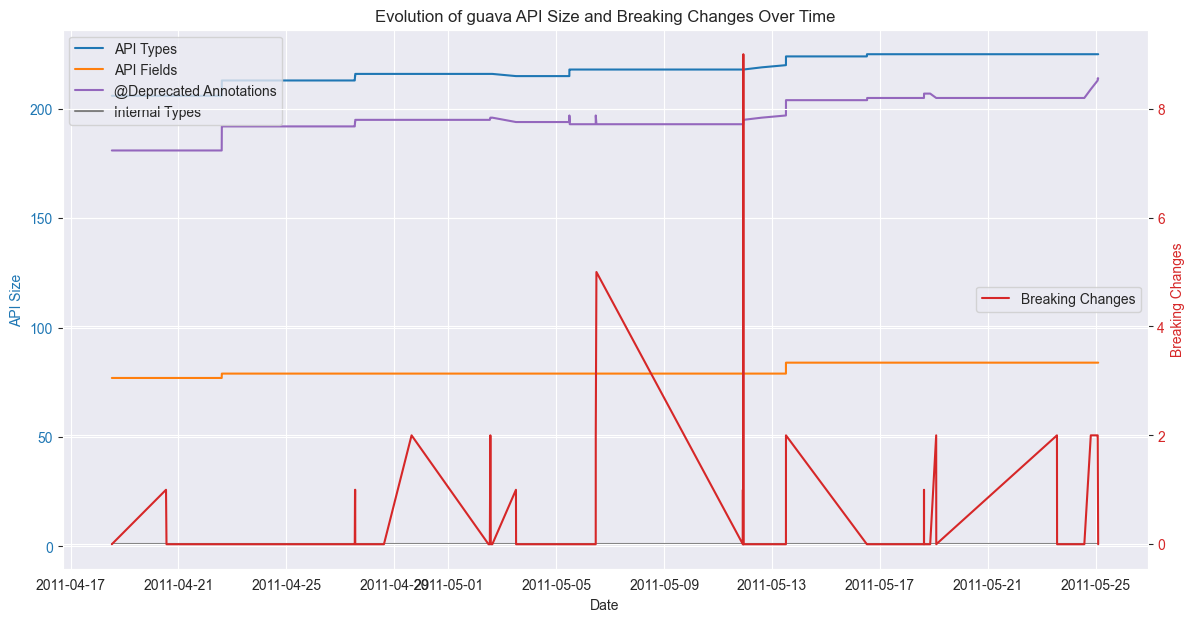

File commons-lang.csv not found.
File h2database.csv not found.
File jackson-databind.csv not found.
File jdk.csv not found.


In [40]:
for lib_analyzed in LIBS_ANALYZED:
    process_lib(lib_analyzed)